<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [2]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [3]:


START = "2015-01-01"
TODAY = dt.datetime.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
data = load_data('AAPL')
df=data
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.320427,24.789796,23.879976,24.778673,212818400
1,2015-01-05,23.635292,24.169172,23.448435,24.089090,257142000
2,2015-01-06,23.637514,23.897780,23.274920,23.699800,263188400
3,2015-01-07,23.968964,24.069065,23.735391,23.846616,160423600
4,2015-01-08,24.889904,24.947741,24.180289,24.298189,237458000


In [5]:
df = df.drop(columns=[col for col in ['Date', 'Adj Close'] if col in df.columns])
df.head()

<ipython-input-5-cb56483eba04>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(columns=[col for col in ['Date', 'Adj Close'] if col in df.columns])


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.320427,24.789796,23.879976,24.778673,212818400
1,23.635292,24.169172,23.448435,24.089090,257142000
2,23.637514,23.897780,23.274920,23.699800,263188400
3,23.968964,24.069065,23.735391,23.846616,160423600
4,24.889904,24.947741,24.180289,24.298189,237458000


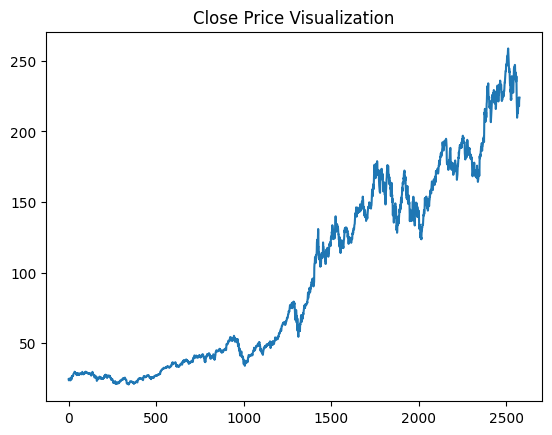

In [6]:
plt.title("Close Price Visualization")
if "Close" in df.columns:
    plt.plot(df["Close"])
    plt.title("Close Price Visualization")
else:
    print("Column 'Close' not found in dataset")

In [7]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,24.320427,24.789796,23.879976,24.778673,212818400
1,23.635292,24.169172,23.448435,24.089090,257142000
2,23.637514,23.897780,23.274920,23.699800,263188400
3,23.968964,24.069065,23.735391,23.846616,160423600
4,24.889904,24.947741,24.180289,24.298189,237458000
...,...,...,...,...,...
2573,223.850006,224.990005,220.559998,221.389999,37094800
2574,217.899994,223.809998,217.679993,221.669998,39818600
2575,222.130005,225.619995,216.229996,217.009995,65299300


# Plotting moving averages of 100 day

---



In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2573,234.592313
2574,234.517174
2575,234.514269
2576,234.530945


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

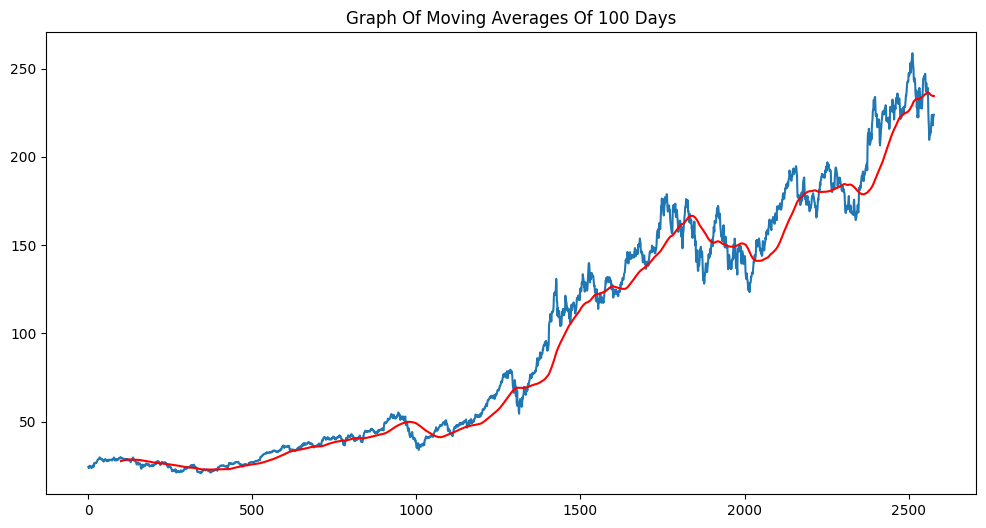

In [9]:
plt.figure(figsize = (12,6))
if "Close" in df.columns:
    plt.plot(df["Close"])
    plt.title("Close Price Visualization")
else:
    print("Column 'Close' not found in dataset")
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2573,228.502837
2574,228.629972
2575,228.708341
2576,228.762510


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

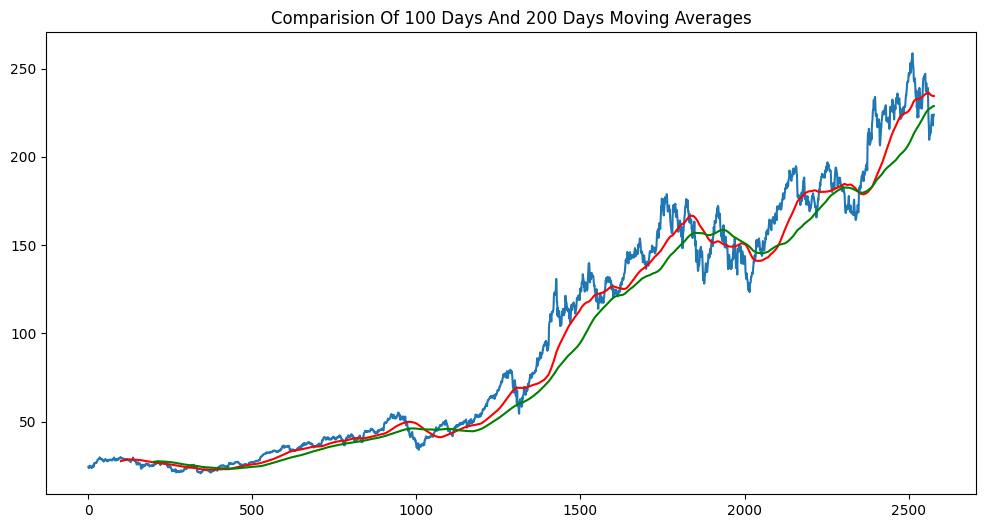

In [11]:
plt.figure(figsize = (12,6))
if "Close" in df.columns:
    plt.plot(df["Close"])
    plt.title("Close Price Visualization")
else:
    print("Column 'Close' not found in dataset")
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [12]:
df.shape

(2578, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [13]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1804, 6)
(774, 6)


In [14]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-01-02,24.320427,24.789796,23.879976,24.778673,212818400
1,2015-01-05,23.635292,24.169172,23.448435,24.089090,257142000
2,2015-01-06,23.637514,23.897780,23.274920,23.699800,263188400
3,2015-01-07,23.968964,24.069065,23.735391,23.846616,160423600
4,2015-01-08,24.889904,24.947741,24.180289,24.298189,237458000


In [15]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
1804,2022-03-03,163.579453,166.216728,162.910302,165.783741,76678400
1805,2022-03-04,160.568207,162.910262,159.515276,161.867166,83737200
1806,2022-03-07,156.759964,162.388760,156.504100,160.755225,96418800
1807,2022-03-08,154.929581,160.282841,153.315732,156.287581,131148300
1808,2022-03-09,160.351715,160.804387,156.868168,158.905153,91454900


# Using MinMax scaler for normalization of the dataset

---



In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [18]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.02631936],
       [0.02197943],
       [0.01952941],
       ...,
       [0.88023803],
       [0.89039485],
       [0.88847518]])

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(1704, 100, 1)

# ML Model (LSTM)

---



In [21]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [31]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data=(x_test, y_test) if 'x_test' in locals() else None, epochs=50)


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 145ms/step - MAE: 0.1378 - loss: 0.0489
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - MAE: 0.0511 - loss: 0.0064
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - MAE: 0.0463 - loss: 0.0057
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - MAE: 0.0429 - loss: 0.0046
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - MAE: 0.0511 - loss: 0.0068
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - MAE: 0.0410 - loss: 0.0042
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - MAE: 0.0413 - loss: 0.0044
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - MAE: 0.0387 - loss: 0.0039
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - MAE: 0.0391 - loss: 0.0038
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - MAE: 0.0398 - loss: 0.0038
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - MAE: 0.0397 - loss: 0.0038
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - MAE: 0.0400 - loss: 0.0040
Epoch 13/50
54/54 ━━━━━━━━━━━━━━━━━

In [35]:
model.save('keras_model.h5')

In [36]:

test_close.shape
test_close

array([[165.78374104],
       [161.86716622],
       [160.75522487],
       [156.28758103],
       [158.90515344],
       [157.64557546],
       [156.39584515],
       [149.03512069],
       [148.49390284],
       [154.54581074],
       [156.08092378],
       [157.95062419],
       [160.90280343],
       [162.87090922],
       [165.31138391],
       [168.3324339 ],
       [171.10746429],
       [169.42471771],
       [173.87266695],
       [175.70301699],
       [175.00431394],
       [171.25509019],
       [171.78646946],
       [174.66974257],
       [169.61171211],
       [168.43081791],
       [169.0409544 ],
       [166.01989505],
       [165.34092422],
       [164.72095297],
       [167.89941733],
       [161.30627041],
       [162.38871858],
       [166.06906378],
       [166.21670513],
       [163.80575379],
       [158.5509061 ],
       [159.66288487],
       [153.42397609],
       [156.71074596],
       [159.25943807],
       [154.21123097],
       [155.62827792],
       [157

In [37]:
past_100_days = pd.DataFrame(train_close[-100:])

In [38]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [42]:
import pandas as pd

final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [43]:
import pandas as pd

# Ensure past_100_days and test_df exist
if 'past_100_days' in locals() and 'test_df' in locals():
    # Correct way to merge DataFrames in Pandas 2.0+
    final_df = pd.concat([past_100_days, test_df], ignore_index=True)

    # Display the first few rows
    print(final_df.head())
else:
    print("Error: One or both DataFrames (past_100_days, test_df) are not defined.")


            0
0  141.346746
1  139.619572
2  140.561677
3  138.608736
4  139.462547


In [44]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.12587688],
       [0.11292418],
       [0.11998936],
       [0.10534355],
       [0.11174659],
       [0.12396371],
       [0.12160865],
       [0.14780867],
       [0.16024666],
       [0.16105653],
       [0.16753254],
       [0.16009956],
       [0.1648832 ],
       [0.165104  ],
       [0.16848946],
       [0.14935445],
       [0.16238111],
       [0.15995243],
       [0.17268468],
       [0.18144244],
       [0.18535559],
       [0.18181775],
       [0.17289941],
       [0.17157301],
       [0.16376025],
       [0.15985377],
       [0.17415249],
       [0.17098316],
       [0.1787958 ],
       [0.19876977],
       [0.22780897],
       [0.25751149],
       [0.25338427],
       [0.25065707],
       [0.24196032],
       [0.24048589],
       [0.24505571],
       [0.30025983],
       [0.23584287],
       [0.27475854],
       [0.27674825],
       [0.31205254],
       [0.33453198],
       [0.35502176],
       [0.35723327],
       [0.40079194],
       [0.35752787],
       [0.356

In [45]:
input_data.shape

(874, 1)

# Testing the model

---



In [46]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [47]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(774, 100, 1)
(774,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [48]:
# Making predictions

y_pred = model.predict(x_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step


In [49]:
y_pred.shape

(774, 1)

In [50]:
y_test

array([0.30913872, 0.27976692, 0.27142807, 0.23792359, 0.25755371,
       0.24810768, 0.2387355 , 0.18353478, 0.17947599, 0.22486143,
       0.2363738 , 0.25039535, 0.27253481, 0.28729435, 0.30559635,
       0.32825229, 0.34906324, 0.33644372, 0.3698005 , 0.38352695,
       0.37828713, 0.35017034, 0.35415535, 0.37577805, 0.33784606,
       0.32899011, 0.33356574, 0.31090973, 0.30581788, 0.30116849,
       0.32500494, 0.27556056, 0.28367822, 0.31127846, 0.31238568,
       0.29430508, 0.25489708, 0.26323621, 0.21644839, 0.24109706,
       0.26021062, 0.22235229, 0.23297924, 0.24419645, 0.27504375,
       0.21887811, 0.21089609, 0.21525665, 0.20032776, 0.12102627,
       0.1344771 , 0.14157227, 0.16603498, 0.15117999, 0.09966729,
       0.09382875, 0.08422083, 0.10654042, 0.08895104, 0.08126459,
       0.14038974, 0.16758716, 0.17372134, 0.15842275, 0.15154955,
       0.15251016, 0.13270346, 0.1639657 , 0.15287997, 0.10262349,
       0.04785908, 0.04978062, 0.05835356, 0.0420206 , 0.02716

In [51]:
y_pred

array([[0.33782762],
       [0.33187962],
       [0.32710415],
       [0.32348913],
       [0.3205973 ],
       [0.3180961 ],
       [0.31569204],
       [0.31312877],
       [0.3100602 ],
       [0.30604643],
       [0.30085373],
       [0.29469264],
       [0.28835878],
       [0.28305513],
       [0.27930266],
       [0.27712756],
       [0.2770259 ],
       [0.27956998],
       [0.28487852],
       [0.29312983],
       [0.30413672],
       [0.3172782 ],
       [0.3313222 ],
       [0.34506902],
       [0.3578463 ],
       [0.3688428 ],
       [0.3774004 ],
       [0.3832535 ],
       [0.38622773],
       [0.386446  ],
       [0.38425422],
       [0.38037926],
       [0.37520325],
       [0.36915958],
       [0.3628501 ],
       [0.3568425 ],
       [0.3514285 ],
       [0.3464567 ],
       [0.34177995],
       [0.33688152],
       [0.33159488],
       [0.32611805],
       [0.32059032],
       [0.31515592],
       [0.30997497],
       [0.30527183],
       [0.30106103],
       [0.297

In [ ]:
scaler.scale_

array([0.00985902])

In [52]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

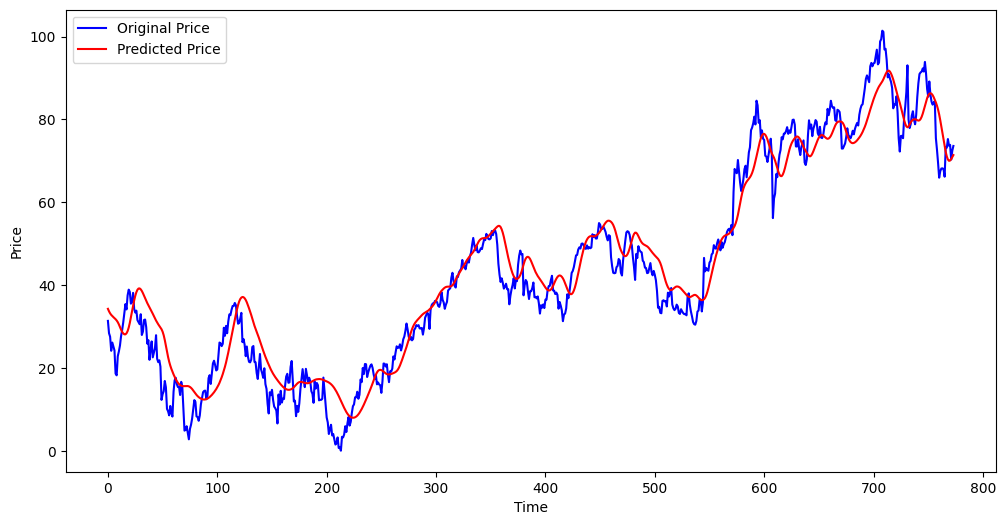

In [53]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [54]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  4.911621604771554
